Saving WA_Fn-UseC_-HR-Employee-Attrition.csv to WA_Fn-UseC_-HR-Employee-Attrition (4).csv
Accuracy: 0.7517006802721088

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.75      0.84       247
           1       0.37      0.77      0.50        47

    accuracy                           0.75       294
   macro avg       0.66      0.76      0.67       294
weighted avg       0.85      0.75      0.78       294



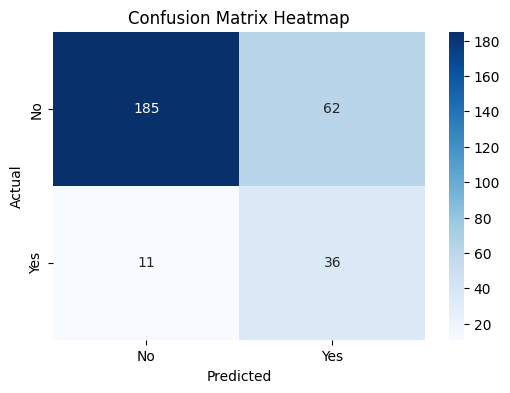

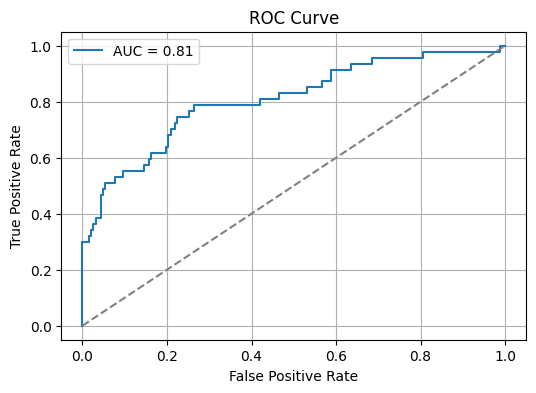

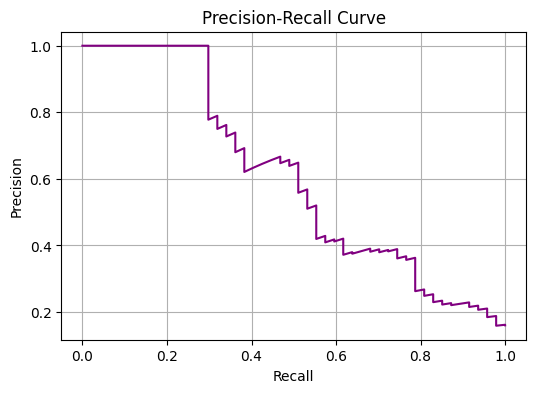

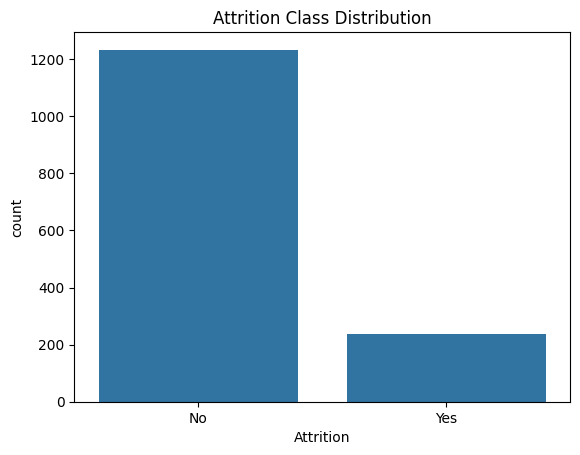

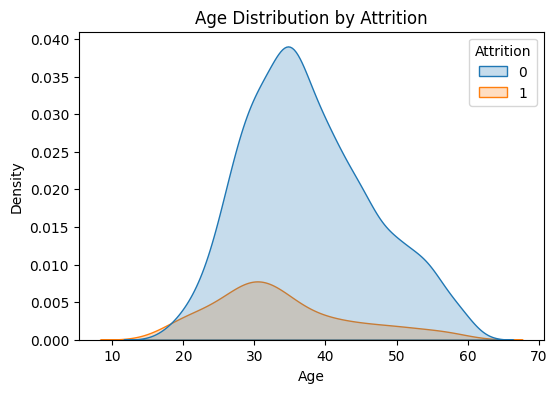

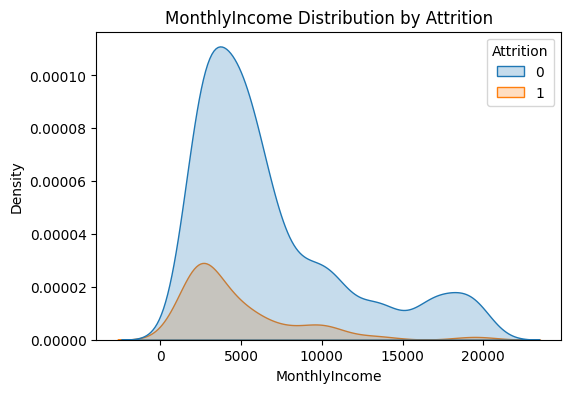

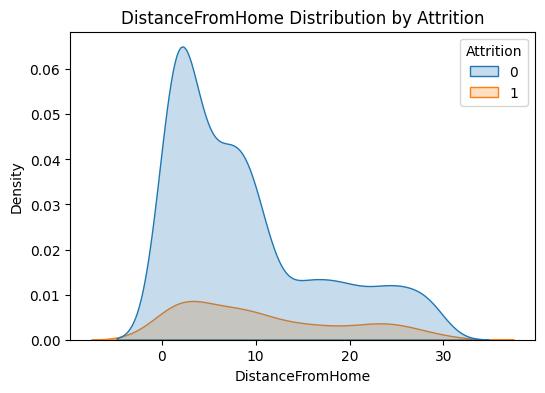

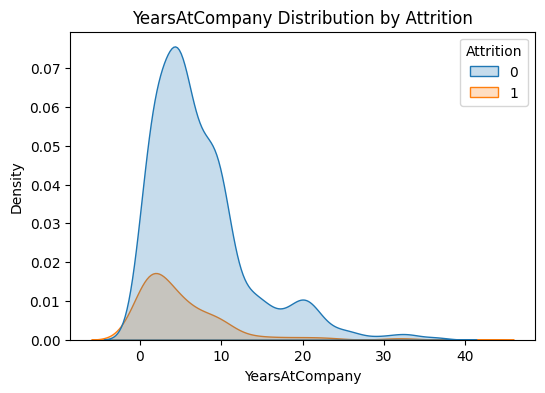

In [5]:
# Upload CSV
from google.colab import files
uploaded = files.upload()

# Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    confusion_matrix, classification_report, accuracy_score,
    roc_curve, auc, precision_recall_curve
)

# Load data
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

# Encode target
le = LabelEncoder()
df['Attrition'] = le.fit_transform(df['Attrition'])

# Drop non-informative columns
df.drop(['EmployeeNumber', 'EmployeeCount', 'Over18', 'StandardHours'], axis=1, inplace=True)

# Encode categorical variables
categorical_cols = df.select_dtypes(include='object').columns
df[categorical_cols] = df[categorical_cols].apply(le.fit_transform)

# Feature-target split
X = df.drop('Attrition', axis=1)
y = df['Attrition']

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, stratify=y, random_state=42)

# Logistic Regression model
model = LogisticRegression(max_iter=1000, random_state=42,class_weight='balnced')
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

# Accuracy and classification report
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix (visual heatmap)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid()
plt.show()

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_proba)
plt.figure(figsize=(6, 4))
plt.plot(recall, precision, color='purple')
plt.title("Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.grid()
plt.show()

# Class distribution
sns.countplot(data=df, x='Attrition')
plt.title("Attrition Class Distribution")
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

# Visualize attrition vs key numeric features
key_features = ['Age', 'MonthlyIncome', 'DistanceFromHome', 'YearsAtCompany']
for feature in key_features:
    plt.figure(figsize=(6, 4))
    sns.kdeplot(data=df, x=feature, hue='Attrition', fill=True)
    plt.title(f"{feature} Distribution by Attrition")
    plt.show()